In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [26]:
for dirpath, dirnames, filenames in os.walk('../../Dataset/pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

In [27]:
num_steak_images_train = len(os.listdir('../../../Dataset/pizza_steak/train/steak'))
num_steak_images_train

750

In [28]:
import pathlib
import numpy as np
data_dir = pathlib.Path('../../Dataset/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

['330182.jpg']
Image shape: (384, 512, 3)


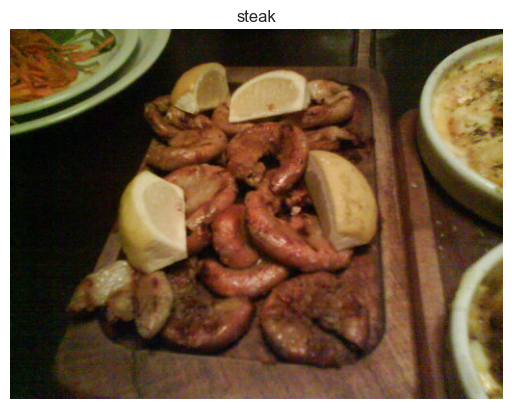

In [30]:
img = view_random_image(target_dir="../../../Dataset/pizza_steak/train/",
                        target_class="steak")

In [31]:
img

array([[[100,  51,  10],
        [ 97,  50,   8],
        [ 92,  50,   8],
        ...,
        [ 55,  12,   6],
        [ 53,   9,   6],
        [ 49,   8,   6]],

       [[ 86,  40,   6],
        [ 86,  42,   7],
        [ 88,  49,  10],
        ...,
        [ 43,  12,   7],
        [ 31,  11,   4],
        [ 22,  12,   2]],

       [[ 78,  33,  10],
        [ 79,  37,  12],
        [ 82,  45,  16],
        ...,
        [ 26,  10,   0],
        [ 14,  17,   0],
        [  5,  23,   0]],

       ...,

       [[ 16,  17,   9],
        [ 11,  17,   7],
        [  8,  18,   7],
        ...,
        [129, 106,  28],
        [127, 105,  22],
        [126, 104,  19]],

       [[ 13,  16,   5],
        [ 13,  16,   5],
        [ 12,  20,   7],
        ...,
        [127, 123,  52],
        [125, 123,  46],
        [124, 125,  45]],

       [[ 12,  16,   2],
        [ 14,  18,   4],
        [ 16,  22,   8],
        ...,
        [127, 137, 100],
        [123, 138,  95],
        [124, 141,  96]]

In [32]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[100,  51,  10],
        [ 97,  50,   8],
        [ 92,  50,   8],
        ...,
        [ 55,  12,   6],
        [ 53,   9,   6],
        [ 49,   8,   6]],

       [[ 86,  40,   6],
        [ 86,  42,   7],
        [ 88,  49,  10],
        ...,
        [ 43,  12,   7],
        [ 31,  11,   4],
        [ 22,  12,   2]],

       [[ 78,  33,  10],
        [ 79,  37,  12],
        [ 82,  45,  16],
        ...,
        [ 26,  10,   0],
        [ 14,  17,   0],
        [  5,  23,   0]],

       ...,

       [[ 16,  17,   9],
        [ 11,  17,   7],
        [  8,  18,   7],
        ...,
        [129, 106,  28],
        [127, 105,  22],
        [126, 104,  19]],

       [[ 13,  16,   5],
        [ 13,  16,   5],
        [ 12,  20,   7],
        ...,
        [127, 123,  52],
        [125, 123,  46],
        [124, 125,  45]],

       [[ 12,  16,   2],
        [ 14,  18,   4],
        [ 16,  22,   8],
        ...,
        [127, 137, 10

In [33]:
img/255.

array([[[0.39215686, 0.2       , 0.03921569],
        [0.38039216, 0.19607843, 0.03137255],
        [0.36078431, 0.19607843, 0.03137255],
        ...,
        [0.21568627, 0.04705882, 0.02352941],
        [0.20784314, 0.03529412, 0.02352941],
        [0.19215686, 0.03137255, 0.02352941]],

       [[0.3372549 , 0.15686275, 0.02352941],
        [0.3372549 , 0.16470588, 0.02745098],
        [0.34509804, 0.19215686, 0.03921569],
        ...,
        [0.16862745, 0.04705882, 0.02745098],
        [0.12156863, 0.04313725, 0.01568627],
        [0.08627451, 0.04705882, 0.00784314]],

       [[0.30588235, 0.12941176, 0.03921569],
        [0.30980392, 0.14509804, 0.04705882],
        [0.32156863, 0.17647059, 0.0627451 ],
        ...,
        [0.10196078, 0.03921569, 0.        ],
        [0.05490196, 0.06666667, 0.        ],
        [0.01960784, 0.09019608, 0.        ]],

       ...,

       [[0.0627451 , 0.06666667, 0.03529412],
        [0.04313725, 0.06666667, 0.02745098],
        [0.03137255, 0

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "../../../Dataset/pizza_steak/train/"
test_dir = "../../../Dataset/pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                  batch_size=32,
                                                  target_size=(224, 224),
                                                  class_mode="binary",
                                                  seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-04-05 20:32:51.715147: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 18s 384ms/step - loss: 0.6343 - accuracy: 0.6153 - val_loss: 0.5308 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 18s 380ms/step - loss: 0.4791 - accuracy: 0.7820 - val_loss: 0.4304 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 19s 395ms/step - loss: 0.4327 - accuracy: 0.8073 - val_loss: 0.3468 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 18s 381ms/step - loss: 0.3868 - accuracy: 0.8260 - val_loss: 0.3262 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 19s 396ms/step - loss: 0.3428 - accuracy: 0.8607 - val_loss: 0.3104 - val_accuracy: 0.8680


In [35]:
print(tf.__version__)

2.10.0


In [36]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 87ms/step - loss: 1.4812 - accuracy: 0.4873 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 78ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 78ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 80ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 80ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [37]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 93ms/step - loss: 4.8797 - accuracy: 0.6487 - val_loss: 3.1666 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 4s 84ms/step - loss: 1.6076 - accuracy: 0.6987 - val_loss: 0.8708 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.8119 - accuracy: 0.7247 - val_loss: 0.5765 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 4s 83ms/step - loss: 0.8144 - accuracy: 0.7440 - val_loss: 0.5226 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 4s 84ms/step - loss: 0.4951 - accuracy: 0.8093 - val_loss: 0.5869 - val_accuracy: 0.7480


In [38]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


['2458401.jpg']
Image shape: (307, 512, 3)
['2959665.jpg']
Image shape: (512, 384, 3)


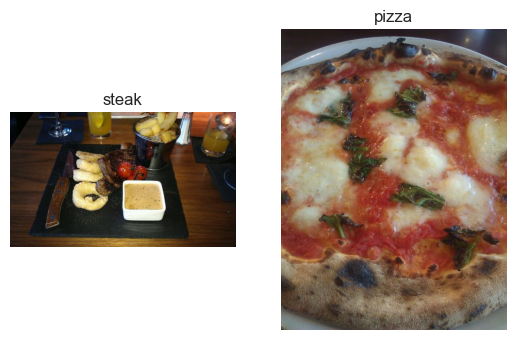

In [39]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="../../../Dataset/pizza_steak/train/",
                              target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="../../../Dataset/pizza_steak/train/",
                              target_class="pizza")

In [40]:
train_dir = "../../../Dataset/pizza_steak/train/"
test_dir = "../../../Dataset/pizza_steak/test/"



In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [42]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [43]:
images, labels = train_data.next() # get the first batch of images and labels
len(images), len(labels)

(32, 32)

In [44]:
len(train_data)

47

In [45]:
1500/32

46.875

In [46]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.models import Sequential



In [49]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [50]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [51]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [86]:
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 21s 449ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7382 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 9.7687e-04 - accuracy: 1.0000 - val_loss: 0.7693 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 22s 475ms/step - loss: 7.3221e-04 - accuracy: 1.0000 - val_loss: 0.7769 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 22s 474ms/step - loss: 6.0533e-04 - accuracy: 1.0000 - val_loss: 0.7975 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 5.1514e-04 - accuracy: 1.0000 - val_loss: 0.8059 - val_accuracy: 0.7780


In [53]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [54]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot: >

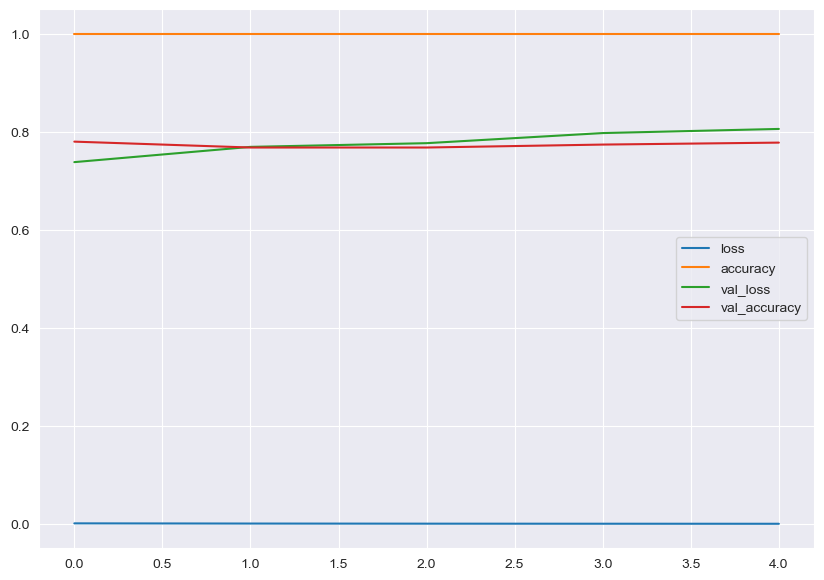

In [87]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [100]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()


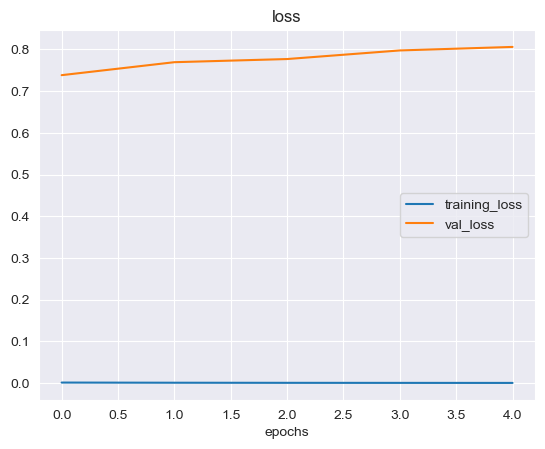

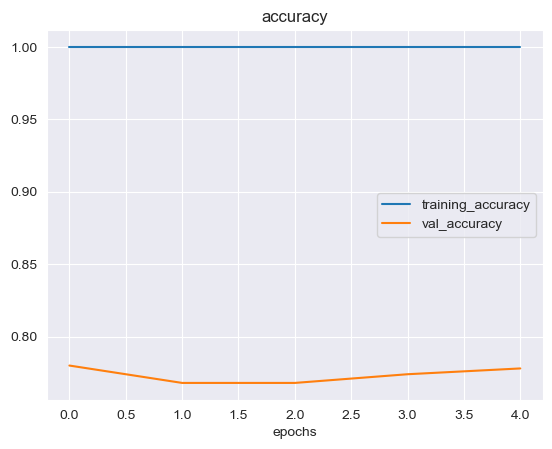

In [101]:
plot_loss(history_4)

In [90]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [92]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [93]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6708 - accuracy: 0.5953 - val_loss: 0.5890 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4763 - accuracy: 0.7967 - val_loss: 0.3739 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4285 - accuracy: 0.8027 - val_loss: 0.3693 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3959 - accuracy: 0.8287 - val_loss: 0.3547 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3731 - accuracy: 0.8373 - val_loss: 0.3486 - val_accuracy: 0.8740


In [94]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

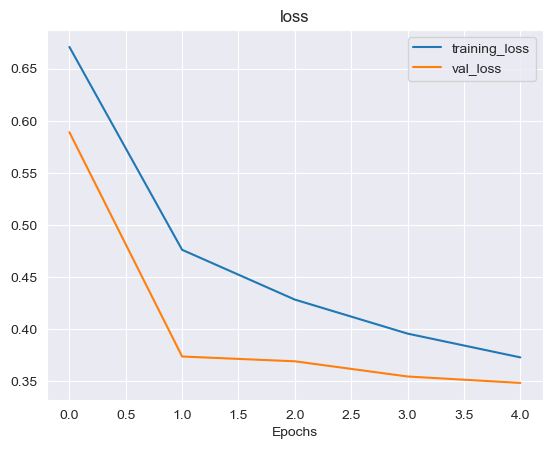

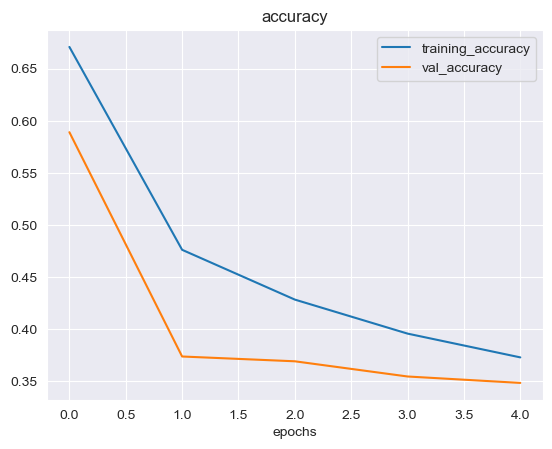

In [95]:
plot_loss(history_5)

In [124]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [104]:
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False)
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [105]:
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next()



showing image number: 18


(-0.5, 223.5, 223.5, -0.5)

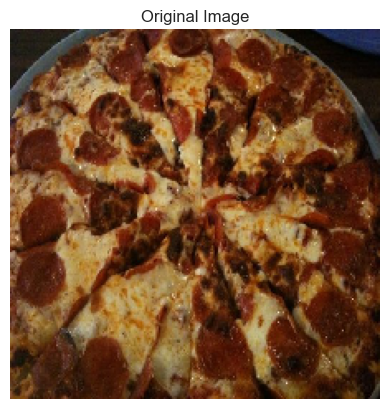

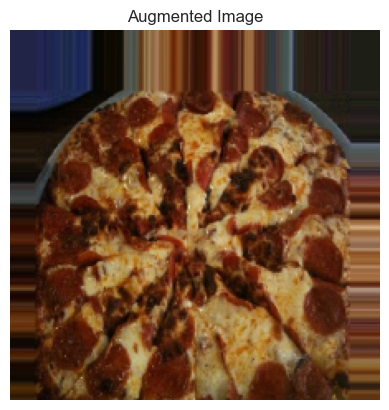

In [122]:
import random
random_number = random.randint(0, 31)
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(images_augmented[random_number])
plt.title(f'Augmented Image')
plt.axis(False)


In [125]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 274ms/step - loss: 0.7785 - accuracy: 0.4167 - val_loss: 0.6858 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 13s 265ms/step - loss: 0.6880 - accuracy: 0.5547 - val_loss: 0.6651 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 13s 271ms/step - loss: 0.6940 - accuracy: 0.6433 - val_loss: 0.6432 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 14s 291ms/step - loss: 0.6693 - accuracy: 0.5987 - val_loss: 0.6126 - val_accuracy: 0.6200
Epoch 5/5
47/47 [==============================] - 14s 285ms/step - loss: 0.6926 - accuracy: 0.6673 - val_loss: 0.6840 - val_accuracy: 0.5800
